- A/B Testing for Product Page Layout
- Data - Sample data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Simulate data
np.random.seed(42)
n=1000

In [4]:
data = pd.DataFrame({
    "user_id":np.arange(1, n+1),
    "group": np.random.choice(['A', 'B'], size=n),
    "device_type": np.random.choice(['desktop', 'mobile'], size=n),
    "time_on_page": np.random.normal(45, 10, size=n)
})

In [5]:
# Simulate add_to_cart with dependecy on layout and time_on_page
def simulate_add_to_cart(row):
    base_prob = 0.15 if row['group'] == 'A' else 0.22
    base_prob += 0.001 * (row['time_on_page'] - 45)
    base_prob += 0.005 if row['device_type'] == 'desktop' else 0
    return np.random.rand() < base_prob

In [7]:
data['added_to_cart'] = data.apply(simulate_add_to_cart, axis=1).astype(int)

In [8]:
# summary stas
summary = data.groupby('group')['added_to_cart'].mean()
print("Add to Cart Rate:\n", summary)

Add to Cart Rate:
 group
A    0.155102
B    0.211765
Name: added_to_cart, dtype: float64


C:\Users\shilpa\AppData\Local\Temp\ipykernel_608\937913979.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data,
C:\Users\shilpa\AppData\Local\Temp\ipykernel_608\937913979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,


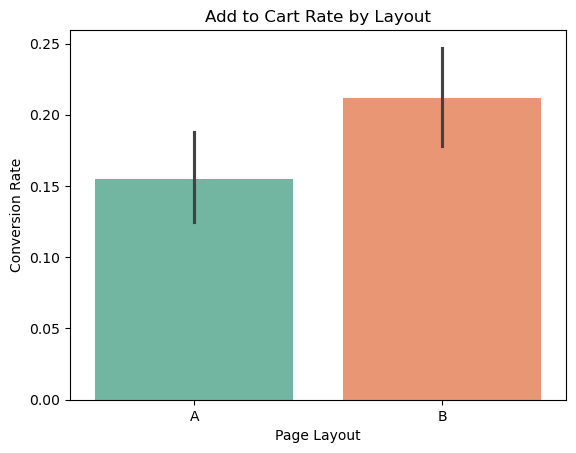

In [9]:
# Visualize
sns.barplot(data=data,
           x='group',
           y='added_to_cart',
           ci=95,
           palette='Set2')
plt.title('Add to Cart Rate by Layout')
plt.ylabel('Conversion Rate')
plt.xlabel('Page Layout')
plt.show()

In [10]:
# Logisitc Regression Model
# convert cat variables to cat dtype
data['group'] = data['group'].astype('category')
data['device_type'] = data['device_type'].astype('category')

In [11]:
# Logistic Regression Model
model = smf.logit('added_to_cart ~ C(group) + time_on_page + C(device_type)', 
                 data=data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.474208
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          added_to_cart   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 May 2025   Pseudo R-squ.:                0.006697
Time:                        15:56:50   Log-Likelihood:                -474.21
converged:                       True   LL-Null:                       -477.40
Covariance Type:            nonrobust   LLR p-value:                   0.09391
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.9181      0.408     -4.701      0.000      -2.718

In [12]:
# Interpretation
print("\nInterpretation:")
print("- Coefficient for C(group)[T.B]: Impact of Layout B vs A")
print("- P-value<0.5 -> Statistically significant imapct")


Interpretation:
- Coefficient for C(group)[T.B]: Impact of Layout B vs A
- P-value<0.5 -> Statistically significant imapct


CONCLUSION
- Layout B (Text First) leads to a statistically significant increase in the likelihood that a visitor will add the product to their cart compared to Layout A (Image First), when controlling for device type and time spent on page.
- Layout B is better at converting visitors to adding products to cart. The effect is statistically significant even when accounting for device and time spent on page. Device type and time don't show significant effects here.